# Data Challenges: An Assessment of the Current State of Real Estate
## Tim Savage | NYU Schack Institute of Real Estate
### Disclaimer: I use code as a tool.  If you want eligant, go to the Met

In [1]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
import datetime as dt
from fredapi import Fred
fred = Fred(api_key='30e6ecb242a73869e11cb35f6aa3afc3')
from IPython.display import Image
import fix_yahoo_finance as yf

Populating the interactive namespace from numpy and matplotlib


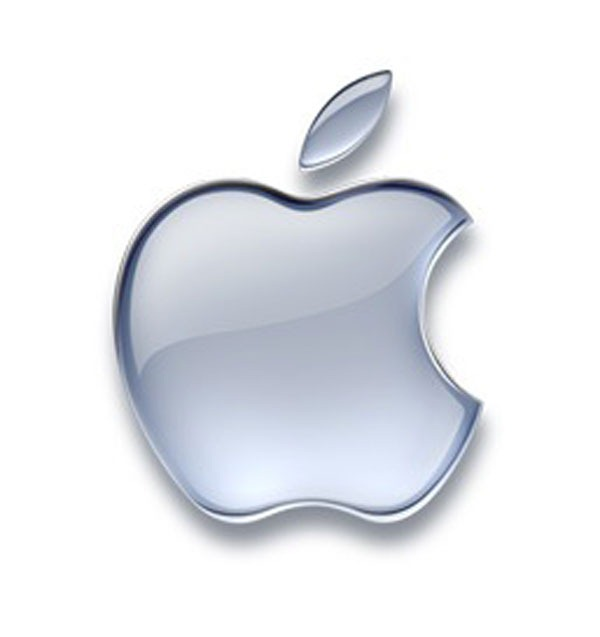

In [2]:
url = 'http://buzzmybiz.co/wp-content/uploads/2012/06/apple-logo.jpg'
Image(url, width=400, height=400)

In [3]:
aapl_all = yf.download('aapl')
aapl = aapl_all['Adj Close']
aapl_returns = (np.log(aapl / aapl.shift(1))).dropna()

[*********************100%***********************]  1 of 1 downloaded


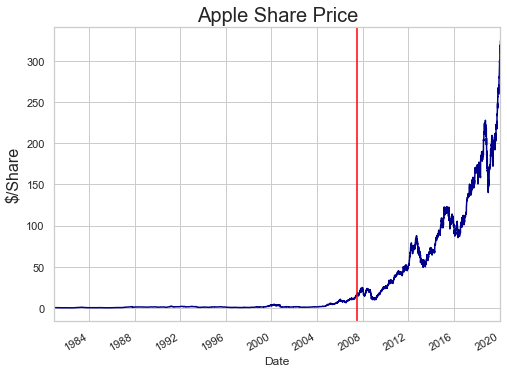

In [4]:
plt.figure(figsize=(8, 6))
aapl.plot(color='darkblue')
plt.title('Apple Share Price', fontsize=20)
plt.ylabel('$/Share', fontsize=16)
plt.axvline(dt.datetime(2007, 6, 29), color="red")

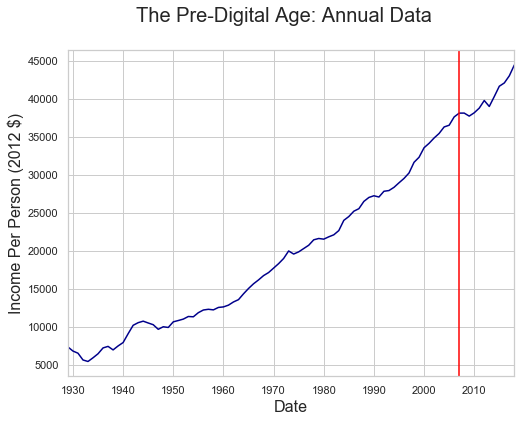

In [5]:
gdp_pc = fred.get_series("A229RX0A048NBEA")

gdp_pc.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('The Pre-Digital Age: Annual Data', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Income Per Person (2012 $)', fontsize=16)
plt.axvline(dt.datetime(2007, 6, 29), color="red")

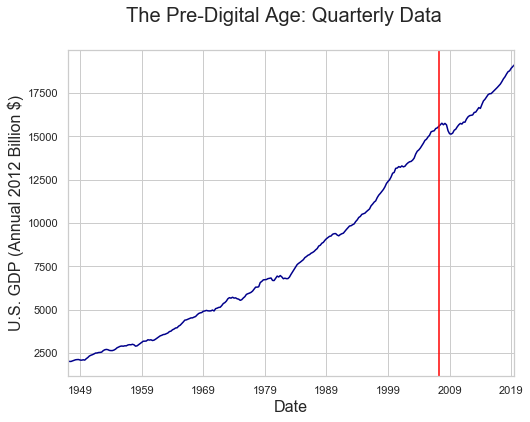

In [6]:
gdp_pc = fred.get_series("GDPC1")

gdp_pc.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('The Pre-Digital Age: Quarterly Data', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('U.S. GDP (Annual 2012 Billion $)', fontsize=16)
plt.axvline(dt.datetime(2007, 6, 29), color="red")

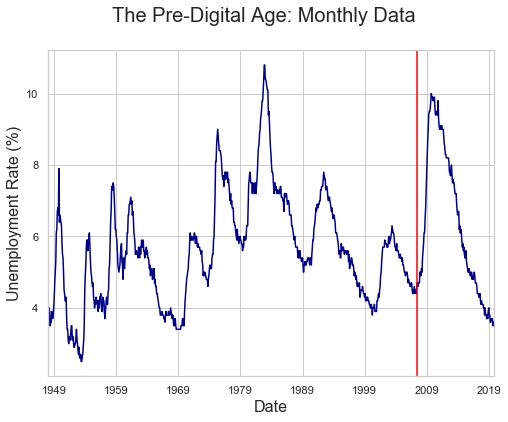

In [7]:
unrate = fred.get_series("UNRATE")

unrate.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('The Pre-Digital Age: Monthly Data', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Unemployment Rate (%)', fontsize=16)
plt.axvline(dt.datetime(2007, 6, 29), color="red")

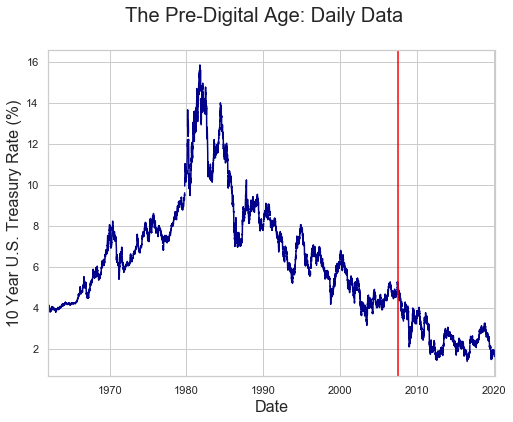

In [8]:
ten_year = fred.get_series("DGS10")

ten_year.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('The Pre-Digital Age: Daily Data', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('10 Year U.S. Treasury Rate (%)', fontsize=16)
plt.axvline(dt.datetime(2007, 6, 29), color="red")

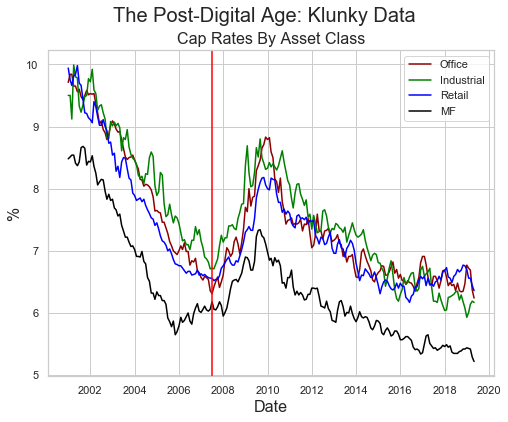

In [9]:
cap_rates = pd.read_excel("cap rates.xls", index_col='Date')
cap_rates = cap_rates.drop(['GT10'], axis=1)
cap_rates = cap_rates.rename(columns={"Retail":"R", "Multifam":"M", "Indust":"I", "Office":"O"})

plt.figure(figsize = (8, 6))
plt.suptitle("The Post-Digital Age: Klunky Data", fontsize=20)
plt.title("Cap Rates By Asset Class", fontsize=16)
plt.plot(cap_rates['O'], label='Office', c='darkred')
plt.plot(cap_rates['I'], label='Industrial', c='green')
plt.plot(cap_rates['R'], label='Retail', c='blue')
plt.plot(cap_rates['M'], label='MF', c='black')
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2007, 6, 29), color="red")

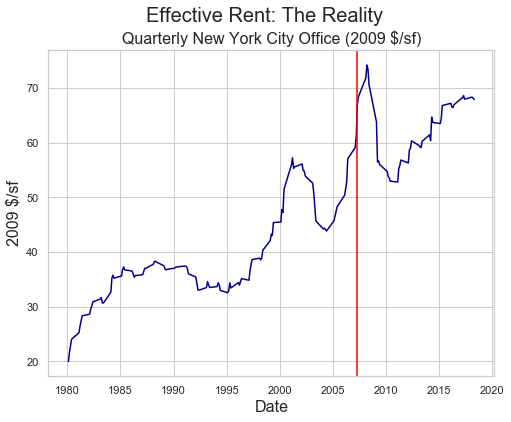

In [10]:
caprates = pd.read_csv('nyc.csv', index_col='Time')

plt.figure(figsize = (8, 6))
plt.suptitle("Effective Rent: The Reality", fontsize=20)
plt.title("Quarterly New York City Office (2009 $/sf)", fontsize=16)
plt.plot(caprates['TW Rent Index ($/sf)'], color='darkblue')
plt.xlabel('Date', fontsize=16)
plt.ylabel('2009 $/sf', fontsize=16)
plt.axvline(2007.3, color="red")

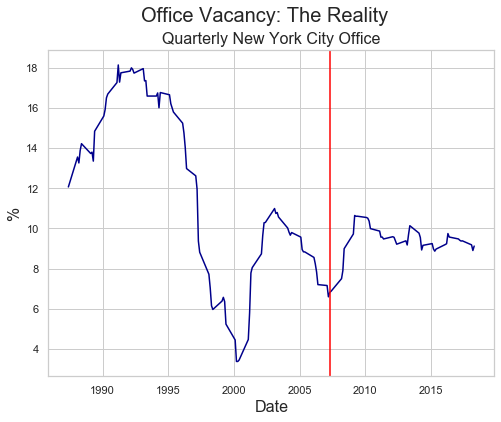

In [11]:
plt.figure(figsize = (8, 6))
plt.suptitle("Office Vacancy: The Reality", fontsize=20)
plt.title("Quarterly New York City Office", fontsize=16)
plt.plot(caprates['Vacancy Rate (%)'], color='darkblue')
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(2007.3, color="red")